# Capstone Project: Honey Label Prediction

# DTSC 691: Default Machine Learning Project

# Name: Dushyant Nayak



# Introduction


Living a healthy lifestyle is the most desired as well as the most challenging goal of the modern
age.

People are becoming more aware about the physical activities for fitness, proactive health checkup and food intake. Due to transparencies most of these are in control of the individual except the quality of food. To give an example, we know that protein is a vital micronutrient and there are a variety of protein sources available in the market. A few dairy products such as cottage cheese, Greek Yogurt etc. are great sources of protein. 

But how do we know that the label provided in the food product is authentic? Egg is a very good source of protein but there are many brands, types of eggs available in the market. Do we know what the difference is?
Which one is better than the other?

Another example is honey, which is a very rich antioxidant, helps in losing weight and also found
to be improving heart health. Health benefits of honey are not limited to a few.
The United States has purchased about 666.5 million U.S. dollars of honey from other countries
in 2021.

In the market, adulterated honey is highly prevalent, and many sorts of adulterations are being
detected.The demand for honey is increasing in the world which is attracting honey adulteration too.

There are adverse impacts if honey is adulterated such as causing diabetes and other conditions.
Due to this, techniques for food authentication are becoming more and more widespread.

Food authentication is the analytical procedure to confirm that a food product complies with the
information on its label.


In this project, I will examine honey datasets (honeydata.rdata) from food authenticity investigations that uses infrared (NIR) spectroscopy. 

"NIR produces data of chemical bonding within the food item and each sample produces different wavelengths which measures absorption of light with wavelengths between 780 and 2500 nm."

Please refer to below link to know more about NIR.

https://www.impopen.com/introduction-near-infrared-nir-spectroscopy

The characteristics of transflectance spectra recorded over a variety of wavelengths which makes up the NIR datasets. 

In this research we will seek to ascertain whether labels of the food samples are accurate. 

This corresponds to a multi-category supervised classification problem, where the known and predicted labels are compared after a classifier has been trained on a batch of data. Additional quality testing can be performed on the samples that are found to have possibly erroneous labels.

Please refer below to know more

https://www.researchgate.net/publication/222693606_A_comparison_of_model-based_and_regression_classification_techniques_applied_to_near_infrared_spectroscopic_data_in_food_authentication_studies

## Data Description

As part of the journey, we are going to analyze honey datasets from food authenticity investigations that were generated through infrared (NIR) spectroscopy.

Honey samples (labeled as pure or adulterated by different adulterants).

Spectra of 478 samples of pure and contaminated honey were recorded over 700 wavelengths in the honey data.
The samples of adulterated honey are then classified into four types according to the type of adulteration: Fully-inverted beet syrup (BI), Fructose: glucose combinations (FG) and High fructose corn syrup (HFCS).

In the dataset, 700 explanatory variables which are predictors. More precisely, the actual predictors will be the components obtained after feature reduction. The outcome will be the class.

### Data Acquisition: 

Original Dataset is honeydata.rdata) was acquired from the researcher over email along with the approval to use it for my project. I processed the honeydata.rdata file and created csv file for better handling.

Dataset csv file (honeydata.csv) will be available in Github and will be shared if needed.
Honey samples (labeled as pure or adulterated by different adulterants).

In [1]:
# Importing all necessary Libraries
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from mpl_toolkits import mplot3d
# Data preprocessing


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KernelCenterer,LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

# Machine Learning Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression



### Data Preparation 



In [2]:
# Actual data file is honeydata.rdata, I converted it into dataframe and then to a csv file 

# result=pyreadr.read_r('honeydata.rdata')

# file = files.upload()


In [3]:
# result=pyreadr.read_r('honeydata.rdata')
# Reading previously created csv file and creating DataFrame out of it.
honeydata_df=pd.read_csv('static/data/honeydata.csv')

honeydata_df=honeydata_df.drop('label',axis=1) # Dropping label columns as Honey Label provides specific information
honeydata_df["label.full"]=honeydata_df["label.full"].map(str.upper)
# Renaming column name to meaningful name 
honeydata=honeydata_df.rename(columns={"label.full": "Honey Label"})
honeydata

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2482,2484,2486,2488,2490,2492,2494,2496,2498,Honey Label
0,0.045821,0.045919,0.046006,0.046081,0.046127,0.046154,0.046193,0.046263,0.046355,0.046462,...,1.234959,1.241331,1.246504,1.250619,1.253306,1.254781,1.255183,1.254414,1.252608,PURE
1,0.046689,0.046794,0.046888,0.046968,0.047018,0.047048,0.047092,0.047168,0.047267,0.047380,...,1.234513,1.241048,1.246333,1.250335,1.253182,1.254740,1.255117,1.254655,1.253190,PURE
2,0.046001,0.046102,0.046191,0.046267,0.046318,0.046352,0.046395,0.046464,0.046560,0.046673,...,1.234073,1.240602,1.245771,1.249675,1.252433,1.253965,1.254278,1.253536,1.251884,PURE
3,0.048385,0.048487,0.048575,0.048646,0.048689,0.048718,0.048762,0.048838,0.048936,0.049045,...,1.239489,1.245921,1.251192,1.255113,1.257610,1.259046,1.259366,1.258606,1.257072,PURE
4,0.049068,0.049169,0.049260,0.049334,0.049379,0.049408,0.049452,0.049526,0.049624,0.049736,...,1.237661,1.244178,1.249474,1.253660,1.256330,1.257720,1.258104,1.257498,1.255944,PURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0.052872,0.052989,0.053077,0.053124,0.053138,0.053141,0.053160,0.053207,0.053275,0.053372,...,1.226327,1.232670,1.237736,1.241450,1.243997,1.245384,1.245688,1.245300,1.243890,HFCS
474,0.053472,0.053585,0.053669,0.053716,0.053735,0.053744,0.053766,0.053815,0.053888,0.053987,...,1.225289,1.231519,1.236439,1.240126,1.242579,1.243923,1.244446,1.243841,1.242360,HFCS
475,0.054380,0.054500,0.054584,0.054630,0.054650,0.054660,0.054680,0.054728,0.054802,0.054905,...,1.227429,1.233494,1.238238,1.241769,1.244228,1.245722,1.246142,1.245564,1.244087,HFCS
476,0.051853,0.051967,0.052051,0.052099,0.052118,0.052126,0.052148,0.052196,0.052266,0.052364,...,1.223287,1.229359,1.234314,1.237890,1.240214,1.241604,1.241979,1.241442,1.239931,HFCS


In [4]:
# Checking if any row(s) has null values in Honey Label column

honeydata['Honey Label'].isna().sum()


0

In [5]:
# Checking null value count in whole dataframe
honeydata.isna().sum().sum()

0

In [6]:
# Replacing null values with 0
# honeydata.fillna(value=0,inplace=True)

In [7]:
# Preparing data in row/column format
# result.keys()  # To know the keys
# honey = result["honey"]
# label = result["label"]
# label_full = result["label.full"]
# Random_seed= result[".Random.seed"]

# honey_label=pd.concat([honey, label], axis=1)

# honeydata is Dataframe stores complete data in row/column format

# honeydata=pd.concat([honey_label, label_full], axis=1)


# honey_no_labels is Dataframe stores data without labels.
label_full = honeydata["Honey Label"].copy()
honey_no_labels=honeydata.iloc[ :,:700].copy()
honey_no_labels
# honeydata.to_csv('honeydata.csv')


,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,0.045821,0.045919,0.046006,0.046081,0.046127,0.046154,0.046193,0.046263,0.046355,0.046462,...,1.227317,1.234959,1.241331,1.246504,1.250619,1.253306,1.254781,1.255183,1.254414,1.252608
1,0.046689,0.046794,0.046888,0.046968,0.047018,0.047048,0.047092,0.047168,0.047267,0.047380,...,1.226857,1.234513,1.241048,1.246333,1.250335,1.253182,1.254740,1.255117,1.254655,1.253190
2,0.046001,0.046102,0.046191,0.046267,0.046318,0.046352,0.046395,0.046464,0.046560,0.046673,...,1.226350,1.234073,1.240602,1.245771,1.249675,1.252433,1.253965,1.254278,1.253536,1.251884
3,0.048385,0.048487,0.048575,0.048646,0.048689,0.048718,0.048762,0.048838,0.048936,0.049045,...,1.231740,1.239489,1.245921,1.251192,1.255113,1.257610,1.259046,1.259366,1.258606,1.257072
4,0.049068,0.049169,0.049260,0.049334,0.049379,0.049408,0.049452,0.049526,0.049624,0.049736,...,1.230021,1.237661,1.244178,1.249474,1.253660,1.256330,1.257720,1.258104,1.257498,1.255944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0.052872,0.052989,0.053077,0.053124,0.053138,0.053141,0.053160,0.053207,0.053275,0.053372,...,1.218939,1.226327,1.232670,1.237736,1.241450,1.243997,1.245384,1.245688,1.245300,1.243890
474,0.053472,0.053585,0.053669,0.053716,0.053735,0.053744,0.053766,0.053815,0.053888,0.053987,...,1.218009,1.225289,1.231519,1.236439,1.240126,1.242579,1.243923,1.244446,1.243841,1.242360
475,0.054380,0.054500,0.054584,0.054630,0.054650,0.054660,0.054680,0.054728,0.054802,0.054905,...,1.220192,1.227429,1.233494,1.238238,1.241769,1.244228,1.245722,1.246142,1.245564,1.244087
476,0.051853,0.051967,0.052051,0.052099,0.052118,0.052126,0.052148,0.052196,0.052266,0.052364,...,1.216178,1.223287,1.229359,1.234314,1.237890,1.240214,1.241604,1.241979,1.241442,1.239931


In [8]:
honeydata.shape

(478, 701)

In [9]:
honeydata.head(2)

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2482,2484,2486,2488,2490,2492,2494,2496,2498,Honey Label
0,0.045821,0.045919,0.046006,0.046081,0.046127,0.046154,0.046193,0.046263,0.046355,0.046462,...,1.234959,1.241331,1.246504,1.250619,1.253306,1.254781,1.255183,1.254414,1.252608,PURE
1,0.046689,0.046794,0.046888,0.046968,0.047018,0.047048,0.047092,0.047168,0.047267,0.047380,...,1.234513,1.241048,1.246333,1.250335,1.253182,1.254740,1.255117,1.254655,1.253190,PURE


In [10]:
# Shows last few columns including labels
honeydata[honeydata['Honey Label']=='PURE'].iloc[:,695:].head()



,2490,2492,2494,2496,2498,Honey Label
0,1.253306,1.254781,1.255183,1.254414,1.252608,PURE
1,1.253182,1.254740,1.255117,1.254655,1.253190,PURE
2,1.252433,1.253965,1.254278,1.253536,1.251884,PURE
3,1.257610,1.259046,1.259366,1.258606,1.257072,PURE
4,1.256330,1.257720,1.258104,1.257498,1.255944,PURE


### Exploratory Data Analysis including Visualization 
https://www.baeldung.com/cs/correlation-classification-algorithms


In [11]:
# Exploring data by shape and size as dataset is high-dimensional.
# Please refer to the below link to learn why a dataset is high-dimensional and the challenges associated with high-dimensional datasets.

# https://carpentries-incubator.github.io/high-dimensional-stats-r/01-introduction-to-high-dimensional-data/index.html

# The inference from the above paragraph is to use suitable visualization method to 
# understand the relationship between the features and use the appropriate 
# pre-rocessing techniques before passing to Machine Learning classification Algorithms



In [12]:
# Visualization methods:

# 1- Normal Distribution plot
# We must determine whether the data contains outliers or skewness and whether data transformation is required.
# After visualization, it was discovered that the data is not ideally normally distributed due to skewness.

# This can be handled by using preprocessing techniques called as feature selection methods such as PCA, TSNE

# 2- Categorical Plot

# Using the catplot, we can visualize the relationship between different categories of honey sample data.
# The difference in data distribution between a pure sample and an adulterated sample is obvious.

# 3- Pairs Plot

# Pairs plot shows the relationship between each pair of the columns, i.e., if there are 4 columns, there will be 2^4 plots.
# Because there are approximately 700 columns, we will use four columns to visualize using a pairplot.

# 4- Spectra Plot

# We can easily visualize that lines related to each category of honey samples are not spelled out clearly.
# There is evidence of noise in the dataset, which can be handled through the feature selection techniques.


In [13]:
honey_no_labels.shape

(478, 700)

In [14]:
honey_no_labels.head(2)

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,0.045821,0.045919,0.046006,0.046081,0.046127,0.046154,0.046193,0.046263,0.046355,0.046462,...,1.227317,1.234959,1.241331,1.246504,1.250619,1.253306,1.254781,1.255183,1.254414,1.252608
1,0.046689,0.046794,0.046888,0.046968,0.047018,0.047048,0.047092,0.047168,0.047267,0.047380,...,1.226857,1.234513,1.241048,1.246333,1.250335,1.253182,1.254740,1.255117,1.254655,1.253190


In [15]:
nrows=honey_no_labels.shape[0] # no of rows
ncols=honey_no_labels.shape[1]# no of cols
labels_only=honeydata['Honey Label'].copy() # Only Labels

labels_only

0      PURE
1      PURE
2      PURE
3      PURE
4      PURE
       ... 
473    HFCS
474    HFCS
475    HFCS
476    HFCS
477    HFCS
Name: Honey Label, Length: 478, dtype: object

In [16]:
honeydata.shape

(478, 701)

In [17]:
honeydata.describe()

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.047177,0.047285,0.047379,0.047447,0.047488,0.047521,0.047569,0.047640,0.047731,0.047842,...,1.228566,1.236156,1.242557,1.247765,1.251723,1.254429,1.255950,1.256379,1.255828,1.254322
std,0.004727,0.004729,0.004725,0.004714,0.004698,0.004682,0.004669,0.004658,0.004649,0.004641,...,0.009787,0.009861,0.009920,0.009970,0.010028,0.010071,0.010124,0.010183,0.010244,0.010317
min,0.037472,0.037576,0.037671,0.037758,0.037824,0.037871,0.037924,0.038003,0.038105,0.038227,...,1.194760,1.202070,1.208260,1.213220,1.217011,1.219747,1.221459,1.222133,1.221913,1.220903
25%,0.044349,0.044460,0.044555,0.044632,0.044689,0.044738,0.044790,0.044859,0.044946,0.045057,...,1.221540,1.229041,1.235474,1.240712,1.244695,1.247457,1.248937,1.249304,1.248539,1.246818
50%,0.046856,0.046961,0.047056,0.047126,0.047162,0.047188,0.047237,0.047315,0.047419,0.047526,...,1.226940,1.234653,1.241133,1.246372,1.250326,1.252999,1.254392,1.254761,1.254317,1.252703
75%,0.049036,0.049145,0.049243,0.049314,0.049357,0.049394,0.049444,0.049518,0.049611,0.049713,...,1.233279,1.240938,1.247072,1.252442,1.256381,1.259028,1.260404,1.260945,1.260472,1.259058
max,0.061835,0.061938,0.062021,0.062070,0.062085,0.062081,0.062094,0.062145,0.062223,0.062323,...,1.297056,1.303791,1.309325,1.313561,1.317091,1.319402,1.320696,1.320654,1.319697,1.318006


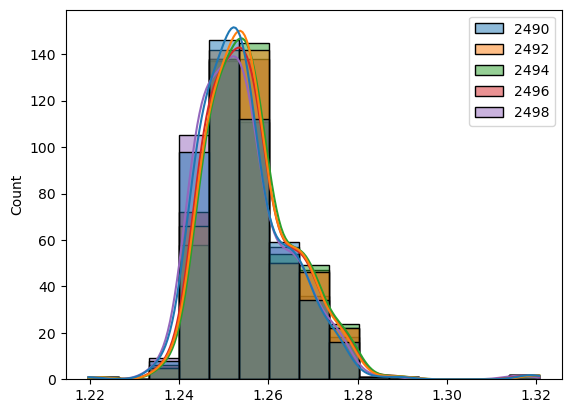

In [18]:
# Visualizing the distribution of the data, it is equaly distributed as expected
# This data is representing nearly normally distributed
sns.histplot(honeydata.iloc[:,695:], bins=15, kde=True)                
plt.show()

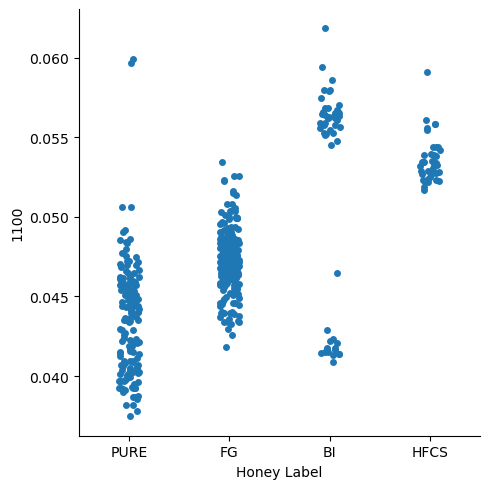

In [19]:
# Plotted random column to see the data spread for the Honey Labels categories

catplt = sns.catplot(x='Honey Label', y='1100', data=honeydata)
# Catagorical plot of Honeydata is showing relationship between pure and adulterated honey sample.

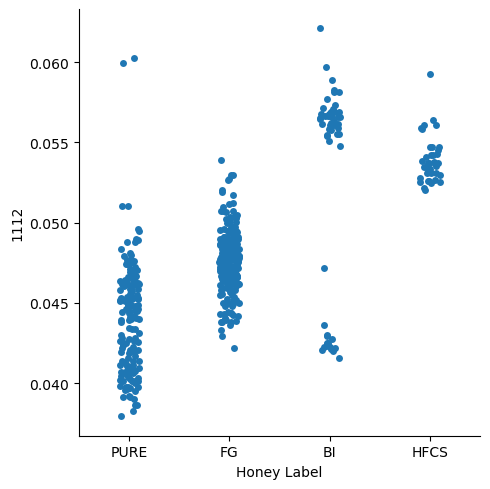

In [20]:

catplt = sns.catplot(x='Honey Label', y='1112', data=honeydata)

<AxesSubplot: xlabel='1100', ylabel='1122'>

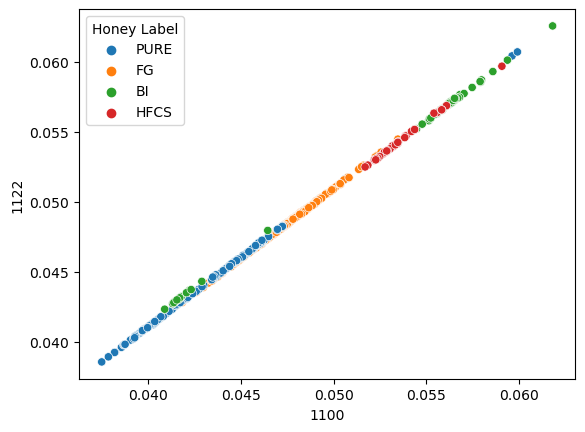

In [21]:
# Shows that data is highly correlated to neighboring features
# Values are sequentially growing as the column sequence

sns.scatterplot(x='1100',y='1122',hue='Honey Label',data=honeydata)

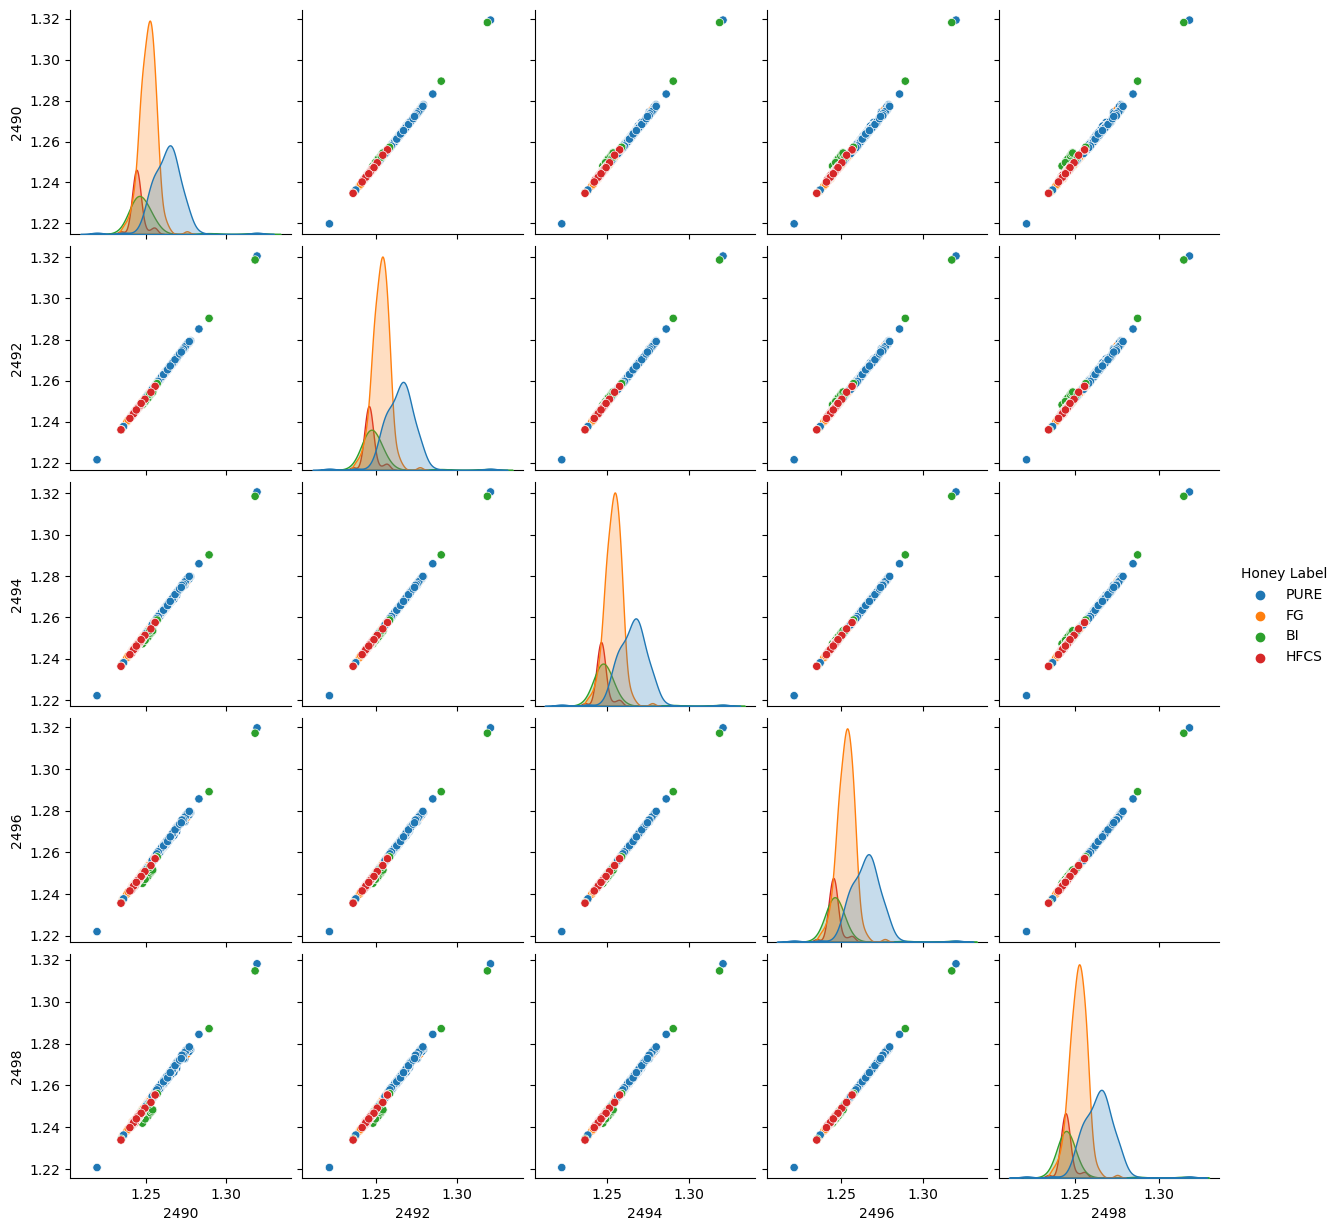

In [22]:
# Pairplot to visualize the best set of features to describe a relationship 
# between two variables or to form the most separated groups
sns.pairplot(honeydata.iloc[:,695:],hue = 'Honey Label')
plt.show()

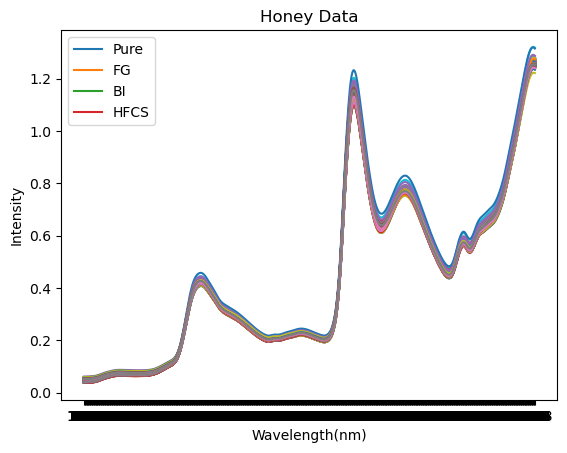

In [23]:
plt.plot((honey_no_labels.transpose()) )
plt.xlabel("Wavelength(nm)")
plt.ylabel("Intensity")
plt.title("Honey Data")
plt.legend( ("Pure","FG","BI","HFCS"))

In [24]:
# Unique labels- 4 Categories
labels_only.unique()


array(['PURE', 'FG', 'BI', 'HFCS'], dtype=object)

In [25]:

# plt.scatter(honey_no_labels.iloc[:,1], honey_no_labels.iloc[:,2],c=['Red','Green','Blue','Yellow'])
# plt.show()



## ML Model Training

In [26]:
# Tested with 20:80 as well as 30:70 split but best accuracy could be found using 20:80, hence using only 80:20
# X_train, X_test, y_train, y_test = train_test_split(honey_no_labels, labels_only,test_size=0.30,stratify=labels_only,random_state=1)

X_train, X_test, y_train, y_test = train_test_split(honey_no_labels, labels_only,test_size=0.20,stratify=labels_only,random_state=1)

X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)



In [27]:
labels_only.value_counts()

FG      225
PURE    157
BI       56
HFCS     40
Name: Honey Label, dtype: int64

In [28]:
y_train.value_counts()

FG      180
PURE    125
BI       45
HFCS     32
Name: Honey Label, dtype: int64

In [29]:
y_test.unique()

array(['PURE', 'FG', 'HFCS', 'BI'], dtype=object)

In [30]:
y_test.value_counts()

FG      45
PURE    32
BI      11
HFCS     8
Name: Honey Label, dtype: int64

#### PCA (Principal Component Analyzes) 

The datasets have high dimensions and are highly correlated to neighboring features, with the number of features (p) exceeding the number of instances (n), p<<n. Principal Components Analysis (PCA) for pre-processing phase seems to be typical methods for dimension reduction in this data.

Transforming the data to it's 4 principal components

In [31]:

def get_pca_df(X_train_df,X_test_df,y_train,y_test):
# Fitting and transforming training but only transforming test dataset
    pca=PCA(n_components=3)
    X_train_pca=pca.fit_transform(X_train_df)

# X_test_pca=pca.fit_transform(X_train_df)
# Generating Explained Variance Ratio and singular values
    explained_variance = pca.explained_variance_ratio_
    singular_values = pca.singular_values_
    X_test_pca=pca.transform(X_test_df)

# Plotting explained variance plot

# Create an x for each component
    x = np.arange(1,len(explained_variance)+1)
# Plot the results
    plt.plot(x, explained_variance)

    plt.title("PCA explained variance plot")
# Adding x and y labels
    plt.xlabel("Components")
    plt.ylabel('Share of Variance Explained')
#show the resuling plot
    plt.show()

    for i in range(0, 3):
        print(f"Component {i:>3} accounts for {explained_variance[i]*100:>2.2f}% of variance")

# Building PCA DataFrame of train Dataset
    pca_train_df = pd.DataFrame(data = X_train_pca,
                     columns = ["PC1", 
                                "PC2",
                                "PC3"
                                ])
    pca_train_df=pca_train_df.reset_index(drop=True)
    pca_train_df['Target']=y_train

# Building PCA DataFrame of test Dataset

    pca_test_df = pd.DataFrame(data = X_test_pca,
                     columns = ["PC1", 
                                "PC2",
                                "PC3"
                                ])
    pca_test_df=pca_test_df.reset_index(drop=True)
# pca_test_df_withlabels=pca_test_df.copy()
    return (pca_train_df,pca_test_df)


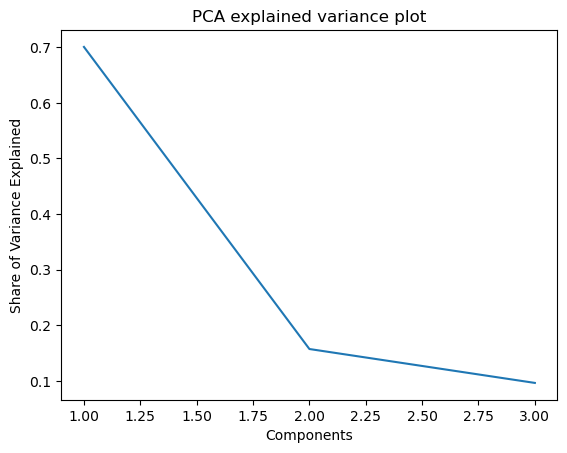

Component   0 accounts for 70.05% of variance
Component   1 accounts for 15.74% of variance
Component   2 accounts for 9.64% of variance


In [32]:
pca_train_df,pca_test_df=get_pca_df(X_train,X_test,y_train,y_test)

In [33]:
X_test

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,0.044366,0.044470,0.044562,0.044643,0.044700,0.044744,0.044804,0.044885,0.044981,0.045097,...,1.237596,1.245569,1.252395,1.258031,1.262390,1.265435,1.267185,1.267589,1.267275,1.266183
1,0.047987,0.048093,0.048191,0.048259,0.048291,0.048314,0.048360,0.048430,0.048515,0.048617,...,1.223189,1.230761,1.237164,1.242411,1.246262,1.248897,1.250472,1.250875,1.250213,1.248523
2,0.045446,0.045554,0.045641,0.045694,0.045721,0.045749,0.045793,0.045860,0.045950,0.046060,...,1.222279,1.230075,1.236661,1.241965,1.246212,1.249218,1.250769,1.251142,1.250628,1.249101
3,0.044549,0.044653,0.044745,0.044811,0.044843,0.044868,0.044915,0.044989,0.045082,0.045191,...,1.222852,1.230486,1.237088,1.242623,1.246702,1.249607,1.251244,1.251605,1.251114,1.249676
4,0.045946,0.046060,0.046159,0.046240,0.046304,0.046358,0.046415,0.046495,0.046600,0.046728,...,1.233603,1.241146,1.247545,1.252771,1.256633,1.259252,1.260722,1.261086,1.260522,1.259084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.045732,0.045842,0.045932,0.046005,0.046064,0.046119,0.046177,0.046245,0.046335,0.046453,...,1.210808,1.218126,1.224332,1.229582,1.233640,1.236274,1.237651,1.238060,1.237627,1.236385
92,0.045786,0.045898,0.045989,0.046062,0.046117,0.046166,0.046222,0.046291,0.046383,0.046503,...,1.238318,1.245889,1.252111,1.257118,1.261002,1.263683,1.265183,1.265651,1.265111,1.263437
93,0.045817,0.045929,0.046025,0.046100,0.046157,0.046209,0.046267,0.046337,0.046427,0.046548,...,1.244560,1.251987,1.258103,1.263165,1.266993,1.269448,1.270823,1.271168,1.270511,1.268938
94,0.049932,0.050041,0.050137,0.050210,0.050249,0.050274,0.050320,0.050401,0.050502,0.050614,...,1.233160,1.240549,1.246775,1.251933,1.255834,1.258344,1.259713,1.260103,1.259660,1.258303


In [34]:
pca_test_df.iloc[0:1]

,PC1,PC2,PC3
0,0.078208,-0.040801,-0.00385


In [35]:
# Uploading test DataFrame as csv for User Interface
# pca_test_df_withlabels.to_csv('pca_test.csv')

In [36]:
X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']


In [37]:
# Analysis by LDA - Linear Discriminant Analysis, training model using train dataset

lda_obj = LDA()
lda_obj.fit(X, y)

X

,PC1,PC2,PC3
0,0.168326,0.115197,0.000055
1,-0.119021,0.031507,0.035939
2,-0.054392,0.016421,-0.003026
3,0.080441,-0.101960,-0.076277
4,0.165869,-0.055690,0.007540
...,...,...,...
377,0.117942,-0.049196,-0.053595
378,-0.136397,0.168119,0.107982
379,-0.018299,0.058526,0.042226
380,0.179626,0.061526,-0.148261


In [38]:
# Exporting model file .pkl for User Interface
pickle.dump(lda_obj, open('static/Models/PCALDA.pkl','wb'))

In [39]:
# Model is trained with training datasets, now testing the accuracy against the test dataset.

pred_honey_label=lda_obj.predict(pca_test_df)
lda_accuracy = metrics.accuracy_score(y_test, pred_honey_label)
print("LDA with PCA Accuracy: {:.2f}%".format(lda_accuracy * 100))

LDA with PCA Accuracy: 77.08%


In [40]:
pred_honey_label[11]


'FG'

In [41]:
y_test[11]

'PURE'

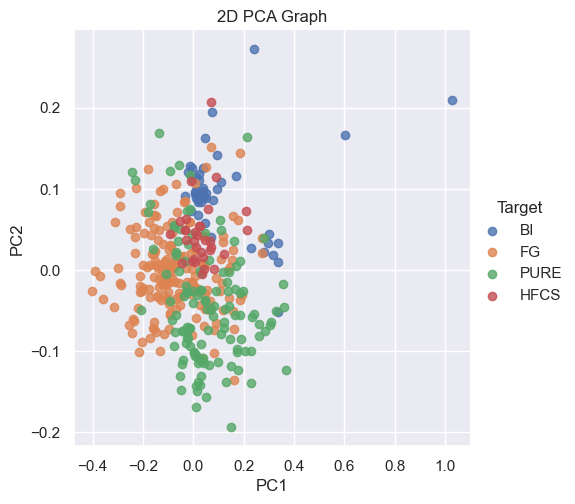

In [42]:
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_train_df, 
    hue='Target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

##### Creating Confusion Matrix:

It is a table that is used in classification problems to assess where errors in the model were made.

The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.



[[ 4  0  0  7]
 [ 1 40  4  0]
 [ 1  2  5  0]
 [ 2  5  0 25]]


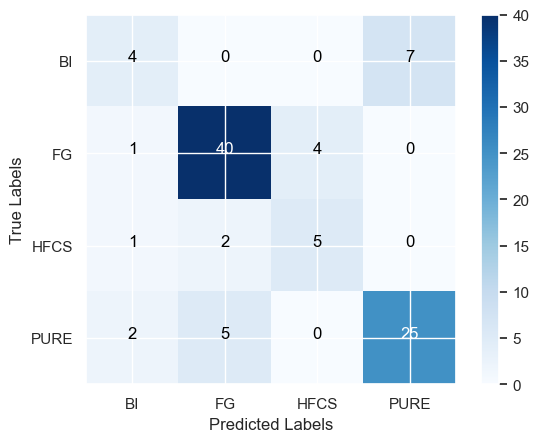

In [43]:

pcalda=confusion_matrix(y_test, pred_honey_label)
print(pcalda)
cmap = plt.cm.get_cmap('Blues')

# Plotting confusion matrix as heatmap
plt.imshow(pcalda, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Set labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding text to every cell to show the count
mid = pcalda.max() / 2.
for i, j in np.ndindex(pcalda.shape):
    plt.text(j, i, pcalda[i, j],
             horizontalalignment="center",
             color="white" if pcalda[i, j] > mid else "black")

# Show and save the confusion matrix plot
plt.savefig('static/Graphs/PCALDA.png')
plt.show()

Now Applying QDA algorithm on the features extracted by PCA

In [44]:
X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']



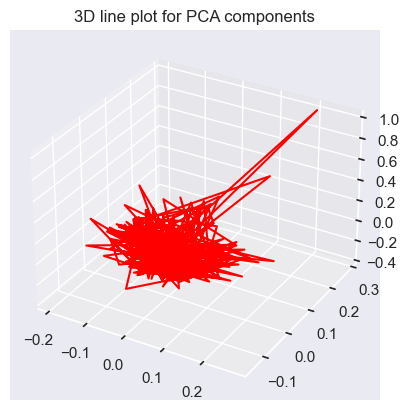

In [45]:
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z1 =   pca_train_df['PC1']
x1 =   pca_train_df['PC2']
y1 =   pca_train_df['PC3']
 
# plotting
ax.plot3D(x1, y1, z1, 'red')
ax.set_title('3D line plot for PCA components')
plt.show()

In [46]:



qda_obj = QDA()
qda_obj.fit(X, y)
pickle.dump(qda_obj, open('static/Models/PCAQDA.pkl','wb'))


In [47]:
qda_pred_honey=qda_obj.predict(pca_test_df)

qda_Accuracy = metrics.accuracy_score(y_test, qda_pred_honey)
print("QDA with PCA Accuracy: {:.2f}%".format(qda_Accuracy * 100))

QDA with PCA Accuracy: 85.42%


[[ 8  0  3  0]
 [ 1 41  2  1]
 [ 0  0  8  0]
 [ 2  4  1 25]]


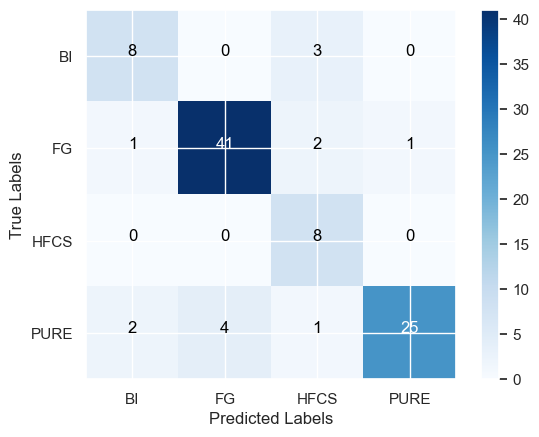

In [48]:
pcaqda=confusion_matrix(y_test, qda_pred_honey)
print(pcaqda)
cmap = plt.cm.get_cmap('Blues')

# Plotting confusion matrix as heatmap
plt.imshow(pcaqda, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Set labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding text to every cell to show the count
mid = pcaqda.max() / 2.
for i, j in np.ndindex(pcaqda.shape):
    plt.text(j, i, pcaqda[i, j],
             horizontalalignment="center",
             color="white" if pcaqda[i, j] > mid else "black")
plt.savefig('static/Graphs/PCAQDA.png')
plt.show()



Now Implementing another Dimension reduction technique - TSNE (T-Distributed Stochastic Neighbor Embedding)

In [49]:
def get_tsne_df(X_train_df,X_test_df,y_train,y_test):
    # TSNE for Dimension Reduction
    tsne_train_std_data = StandardScaler().fit_transform(X_train_df)
    tsne_test_std_data = StandardScaler().fit_transform(X_test_df)

    tsne = TSNE(n_components = 3,random_state=0)

    tsne_train_sne = tsne.fit_transform(tsne_train_std_data)
    tsne_test_sne = tsne.fit_transform(tsne_test_std_data)
  
    tsne_train_sne = np.vstack((tsne_train_sne.T, y_train)).T
    tsne_test_sne = np.vstack((tsne_test_sne.T, y_test)).T    
    
    tsne_train_df = pd.DataFrame(data=tsne_train_sne, columns=("SNE1", "SNE2", "SNE3","Target"))
    tsne_test_df = pd.DataFrame(data=tsne_test_sne, columns=("SNE1", "SNE2", "SNE3","Target"))

    tsne_test_df=tsne_test_df.drop('Target',axis=1)

    
    return (tsne_train_df,tsne_test_df)


In [50]:
tsne_train_df,tsne_test_df=get_tsne_df(X_train,X_test,y_train,y_test)

In [51]:
# tsne_test_df_withlabel.to_csv('tsne_test.csv')

In [52]:
X_tsne=tsne_train_df[['SNE1','SNE2','SNE3']]
y_tsne=tsne_train_df['Target']


In [53]:

# Analysis by LDA - Linear Discriminant Analysis, training model using train SNE dataset

lda_sne_obj = LDA()
lda_sne_obj.fit(X_tsne, y_tsne)

LinearDiscriminantAnalysis()

In [54]:
# Model is trained with training datasets, now testing the accuracy against the test dataset.
sne_pred_honey_label=lda_sne_obj.predict(tsne_test_df)
lda_tsne_accuracy = metrics.accuracy_score(y_test, sne_pred_honey_label)
print("LDA with TSNE Accuracy: {:.2f}%".format(lda_tsne_accuracy * 100))

LDA with TSNE Accuracy: 22.92%


In [55]:
sne_pred_honey_label

array(['PURE', 'HFCS', 'HFCS', 'HFCS', 'PURE', 'PURE', 'BI', 'BI', 'HFCS',
       'FG', 'PURE', 'FG', 'HFCS', 'PURE', 'HFCS', 'BI', 'HFCS', 'PURE',
       'HFCS', 'HFCS', 'FG', 'HFCS', 'HFCS', 'HFCS', 'PURE', 'HFCS', 'BI',
       'FG', 'PURE', 'PURE', 'HFCS', 'BI', 'HFCS', 'FG', 'FG', 'BI',
       'PURE', 'PURE', 'PURE', 'PURE', 'BI', 'PURE', 'PURE', 'HFCS', 'FG',
       'HFCS', 'HFCS', 'PURE', 'PURE', 'PURE', 'FG', 'HFCS', 'PURE',
       'HFCS', 'HFCS', 'PURE', 'FG', 'FG', 'FG', 'HFCS', 'HFCS', 'PURE',
       'HFCS', 'PURE', 'PURE', 'PURE', 'FG', 'PURE', 'FG', 'PURE', 'HFCS',
       'BI', 'HFCS', 'HFCS', 'FG', 'PURE', 'HFCS', 'HFCS', 'PURE', 'HFCS',
       'PURE', 'HFCS', 'HFCS', 'PURE', 'PURE', 'HFCS', 'HFCS', 'HFCS',
       'PURE', 'PURE', 'PURE', 'PURE', 'PURE', 'PURE', 'PURE', 'PURE'],
      dtype='<U4')

[[ 0  3  0  8]
 [ 3  4 24 14]
 [ 1  4  2  1]
 [ 4  3  9 16]]


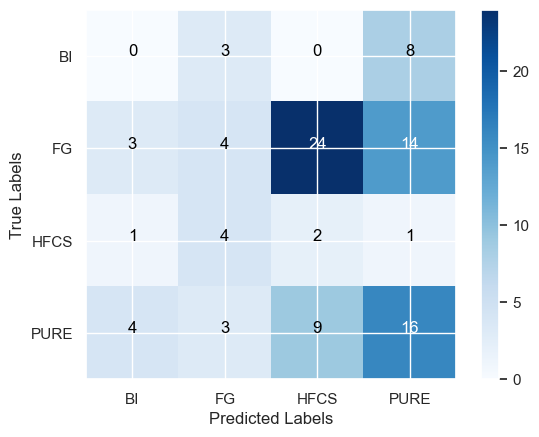

In [56]:
snelda=confusion_matrix(y_test, sne_pred_honey_label)
print(snelda)
cmap = plt.cm.get_cmap('Blues')

# Plotting confusion matrix as heatmap
plt.imshow(snelda, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Set labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding text to every cell to show the count
mid = snelda.max() / 2.
for i, j in np.ndindex(snelda.shape):
    plt.text(j, i, snelda[i, j],
             horizontalalignment="center",
             color="white" if snelda[i, j] > mid else "black")

# Show and save the confusion matrix plot

Now applying QDA on filterted features by TSNE


In [57]:

qda_sne_obj = QDA()
qda_sne_obj.fit(X_tsne, y_tsne)

tsne_pred_honey_label=qda_sne_obj.predict(tsne_test_df)
qda_tsne_accuracy = metrics.accuracy_score(y_test, tsne_pred_honey_label)
print("QDA with TSNE Accuracy: {:.2f}%".format(qda_tsne_accuracy * 100))

QDA with TSNE Accuracy: 28.12%


In [58]:
# Isometric Mapping (Isomap) 



In [59]:
def get_isomap_df(X_train_df,X_test_df,y_train,y_test):
    # Isomap for Dimension Reduction
    Isomap_obj = Isomap(n_components=3)
    X_isomap_train = Isomap_obj.fit_transform(X_train_df)
    X_isomap_test = Isomap_obj.fit_transform(X_test_df)
    isomap_train_df = pd.DataFrame(data=X_isomap_train, columns=("ISOMAP1", "ISOMAP2", "ISOMAP3"))
    isomap_test_df = pd.DataFrame(data=X_isomap_test, columns=("ISOMAP1", "ISOMAP2", "ISOMAP3"))
    isomap_train_df['Target']=y_train
    return (isomap_train_df,isomap_test_df)


In [60]:
isomap_train_df,isomap_test_df = get_isomap_df(X_train,X_test,y_train,y_test)
isomap_test_df

/Users/dunayak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/dunayak/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


,ISOMAP1,ISOMAP2,ISOMAP3
0,0.081141,0.069909,-0.011630
1,-0.250482,-0.039149,0.054122
2,-0.263571,-0.039041,-0.112754
3,-0.267554,-0.040472,-0.118013
4,0.149729,0.061208,0.008661
...,...,...,...
91,-0.073273,-0.060375,0.015109
92,0.082758,0.072580,0.030567
93,0.204174,0.193487,0.056776
94,0.286717,-0.021146,-0.030041


In [61]:
# Analysis by LDA - Linear Discriminant Analysis, training model using train ISOMAP dataset

X=isomap_train_df[['ISOMAP1','ISOMAP2','ISOMAP3']]
y=y_train

isomap_lda_obj = LDA()
isomap_lda_obj.fit(X, y)

LinearDiscriminantAnalysis()

In [62]:
isomap_train_df

,ISOMAP1,ISOMAP2,ISOMAP3,Target
0,0.264138,0.239391,0.102148,BI
1,-0.184322,0.019380,0.050672,FG
2,-0.109816,0.006192,0.007763,FG
3,0.137418,-0.049116,-0.028762,FG
4,0.285744,-0.056379,0.031324,PURE
...,...,...,...,...
377,0.176713,-0.019434,0.012221,FG
378,-0.196122,0.015462,0.221261,PURE
379,-0.105129,0.017851,0.051739,FG
380,0.223318,0.229757,-0.068855,FG


In [63]:
# Model is trained with training datasets, now testing the accuracy against the test dataset.
isomap_pred_honey_label=isomap_lda_obj.predict(isomap_test_df)
lda_isomap_accuracy = metrics.accuracy_score(y_test, isomap_pred_honey_label)


print("LDA with ISOMAP Accuracy: {:.2f}%".format(lda_isomap_accuracy * 100))

LDA with ISOMAP Accuracy: 38.54%


In [64]:
# Implementing more Machine Learning algorithms to check the performance
# Stochastic Gradient Descent (SGDClassifier) with PCA

X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']
SGDC_obj = SGDClassifier(max_iter=5000, tol=1e-3, random_state=1)

SGDC_obj.fit(X,y)
pickle.dump(SGDC_obj, open('static/Models/SGDCPCA.pkl','wb'))



In [65]:
SGDC_pred_honey_label=SGDC_obj.predict(pca_test_df)
SGDC_accuracy = metrics.accuracy_score(y_test, SGDC_pred_honey_label)
print("SGDC with PCA Accuracy: {:.2f}%".format(SGDC_accuracy * 100))

SGDC with PCA Accuracy: 60.42%


[[ 2  0  2  7]
 [ 1 21 18  5]
 [ 1  0  7  0]
 [ 2  0  2 28]]


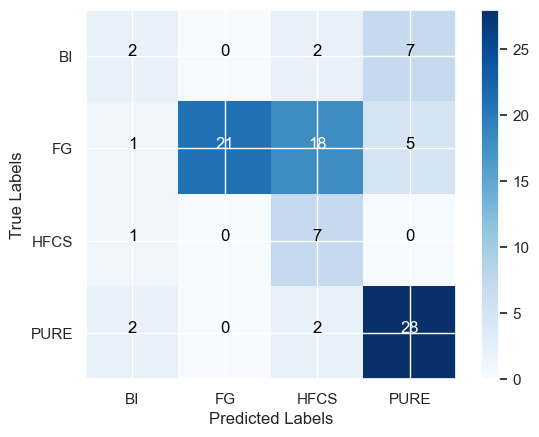

In [66]:
# Confusion Matrix
pcasgdc=confusion_matrix(y_test, SGDC_pred_honey_label)
print(pcasgdc)
cmap = plt.cm.get_cmap('Blues')

# Plotting confusion matrix as heatmap
plt.imshow(pcasgdc, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Set labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding text to every cell to show the count
mid = pcasgdc.max() / 2.
for i, j in np.ndindex(pcasgdc.shape):
    plt.text(j, i, pcasgdc[i, j],
             horizontalalignment="center",
             color="white" if pcasgdc[i, j] > mid else "black")

# Show and save the confusion matrix plot
plt.savefig('static/Graphs/PCASGDC.png')
plt.show()

In [67]:
# Stochastic Gradient Descent (SGDClassifier) with TSNE

X=tsne_train_df[['SNE1','SNE2','SNE3']]
y=tsne_train_df['Target']
SGDC_tsne_obj = SGDClassifier(max_iter=5000, tol=1e-3, random_state=1)

SGDC_tsne_obj.fit(X, y)
pickle.dump(SGDC_obj, open('static/Models/SGDCTSNE.pkl','wb'))

In [68]:
SGDC_tsne_pred_honey_label=SGDC_tsne_obj.predict(tsne_test_df)
SGDC_tsne_accuracy = metrics.accuracy_score(y_test, SGDC_tsne_pred_honey_label)
print("SGDC with TSNE Accuracy: {:.2f}%".format(SGDC_tsne_accuracy * 100))

SGDC with TSNE Accuracy: 16.67%


In [69]:
# Conclusion- PCA represent the best of dataset, hence will use only PCA for future Algorithms

In [70]:
# Implementing more Machine Learning algorithms to check the performance
# KNeighborsClassifier with PCA


X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']
KN_obj=KNeighborsClassifier(n_neighbors=5)
KN_obj.fit(X,y)
pickle.dump(KN_obj, open('static/Models/PCAKNN.pkl','wb'))

In [71]:
KN_pred_honey_label=KN_obj.predict(pca_test_df)
KN_pca_accuracy = metrics.accuracy_score(y_test, KN_pred_honey_label)
print("KNN with PCA Accuracy: {:.2f}%".format(KN_pca_accuracy * 100))

KNN with PCA Accuracy: 91.67%


[[11  0  0  0]
 [ 0 45  0  0]
 [ 1  0  7  0]
 [ 1  6  0 25]]


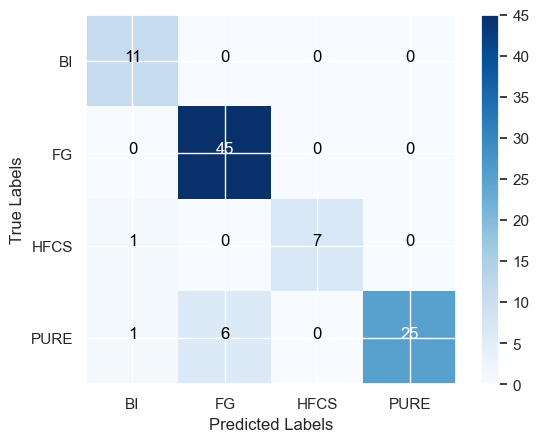

In [72]:
# Confusion Matrix
pcaknn=confusion_matrix(y_test, KN_pred_honey_label)
print(pcaknn)
cmap = plt.cm.get_cmap('Blues')

# Plotting confusion matrix as heatmap
plt.imshow(pcaknn, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Set labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding text to every cell to show the count
mid = pcaknn.max() / 2.
for i, j in np.ndindex(pcaknn.shape):
    plt.text(j, i, pcaknn[i, j],
             horizontalalignment="center",
             color="white" if pcaknn[i, j] > mid else "black")

# Show and save the confusion matrix plot
plt.savefig('static/Graphs/PCAKNN.png')
plt.show()

In [73]:
# KNeighborsClassifier with TSNE
X=tsne_train_df[['SNE1','SNE2','SNE3']]
y=tsne_train_df['Target']
KN_TSNE_obj=KNeighborsClassifier(n_neighbors=5)
KN_TSNE_obj.fit(X,y)

KNeighborsClassifier()

In [74]:
# Predicting using KNeighborsClassifier and printing accuracy
KN_TSNE_pred_honey_label=KN_TSNE_obj.predict(tsne_test_df)
KN_tsne_accuracy = metrics.accuracy_score(y_test, KN_TSNE_pred_honey_label)
print("KNN with TSNE Accuracy: {:.2f}%".format(KN_tsne_accuracy * 100))

KNN with TSNE Accuracy: 23.96%


In [75]:
# SVM (Support Vector Machines) with PCA


X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']
SVM_obj= svm.SVC()
SVM_obj.fit(X,y)
pickle.dump(SVM_obj, open('static/Models/PCASVM.pkl','wb'))


In [76]:
# Predicting using Support Vector Machines and printing accuracy

SVM_pred_honey_label=SVM_obj.predict(pca_test_df)
SVM_pca_accuracy = metrics.accuracy_score(y_test, SVM_pred_honey_label)
print("SVM with PCA Accuracy: {:.2f}%".format(SVM_pca_accuracy * 100))

SVM with PCA Accuracy: 89.58%


[[11  0  0  0]
 [ 0 44  1  0]
 [ 1  0  7  0]
 [ 1  6  1 24]]


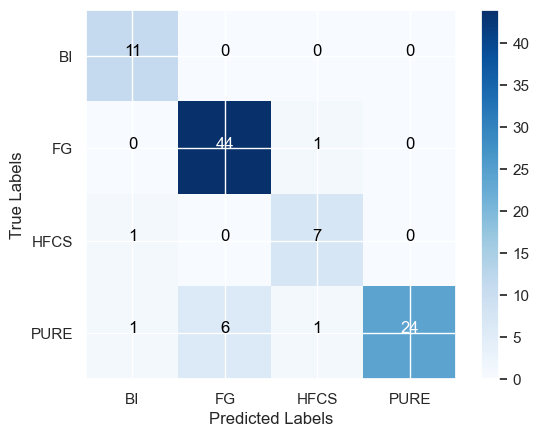

In [77]:
# Confusion Matrix
pcasvm=confusion_matrix(y_test, SVM_pred_honey_label)
print(pcasvm)
cmap = plt.cm.get_cmap('Blues')

# Plotting confusion matrix as heatmap
plt.imshow(pcasvm, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Set labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding text to every cell to show the count
mid = pcasvm.max() / 2.
for i, j in np.ndindex(pcasvm.shape):
    plt.text(j, i, pcasvm[i, j],
             horizontalalignment="center",
             color="white" if pcasvm[i, j] > mid else "black")

# Show and save the confusion matrix plot
plt.savefig('static/Graphs/PCASVM.png')
plt.show()

In [78]:
# LogisticRegression with PCA


X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']
LOG_obj= LogisticRegression(random_state=1)
LOG_obj.fit(X,y)

LogisticRegression(random_state=1)

In [79]:
# Predicting using Support Vector Machines and printing accuracy
LOG_pred_honey_label=LOG_obj.predict(pca_test_df)
LOG_pca_accuracy = metrics.accuracy_score(y_test, LOG_pred_honey_label)
print("Logistic Regression with PCA Accuracy: {:.2f}%".format(LOG_pca_accuracy * 100))

Logistic Regression with PCA Accuracy: 64.58%


In [80]:


le_obj = LabelEncoder()
pls_train_df=X_train.copy()

# Replace categorical values in column 'Honey Label' with integers

pls_train_df['Honey Label'] = le_obj.fit_transform(y_train)
y_pls_test=y_test.copy()

y_pls_test = le_obj.fit_transform(y_pls_test)

# X=pls_train_df.drop('Honey Label', axis=1)
X=pls_train_df.drop('Honey Label', axis=1)

y=pls_train_df['Honey Label']

pls_obj = PLSRegression(n_components=3)
pls_obj.fit(X, y)

# Making predictions on test dataset

PLS_pred_honey_label = pls_obj.predict(X_test)
PLS_pred_honey_label = np.round(PLS_pred_honey_label).astype(int)


In [81]:
PLS_pca_accuracy = metrics.accuracy_score(y_pls_test, PLS_pred_honey_label)
print("Partial Least Squares (PLS) with PCA Accuracy: {:.2f}%".format(PLS_pca_accuracy * 100))

Partial Least Squares (PLS) with PCA Accuracy: 40.62%


In [82]:
# Printing Accuracy score of each Algorithm

print("LDA with PCA Accuracy: {:.2f}%".format(lda_accuracy * 100))
print("QDA with PCA Accuracy: {:.2f}%".format(qda_Accuracy * 100))
print("LDA with TSNE Accuracy: {:.2f}%".format(lda_tsne_accuracy * 100))
print("QDA with TSNE Accuracy: {:.2f}%".format(qda_tsne_accuracy * 100))
print("LDA with ISOMAP Accuracy: {:.2f}%".format(lda_isomap_accuracy * 100))
print("SGDA with PCA Accuracy: {:.2f}%".format(SGDC_accuracy * 100))
print("SGDC with TSNE Accuracy: {:.2f}%".format(SGDC_tsne_accuracy * 100))
print("KNN with PCA Accuracy: {:.2f}%".format(KN_pca_accuracy * 100))
print("KNN with TSNE Accuracy: {:.2f}%".format(KN_tsne_accuracy * 100))
print("SVM with PCA Accuracy: {:.2f}%".format(SVM_pca_accuracy * 100))
print("Logistic Regression with PCA Accuracy: {:.2f}%".format(LOG_pca_accuracy * 100))
print("Partial Least Squares (PLS): {:.2f}%".format(PLS_pca_accuracy * 100))

LDA with PCA Accuracy: 77.08%
QDA with PCA Accuracy: 85.42%
LDA with TSNE Accuracy: 22.92%
QDA with TSNE Accuracy: 28.12%
LDA with ISOMAP Accuracy: 38.54%
SGDA with PCA Accuracy: 60.42%
SGDC with TSNE Accuracy: 16.67%
KNN with PCA Accuracy: 91.67%
KNN with TSNE Accuracy: 23.96%
SVM with PCA Accuracy: 89.58%
Logistic Regression with PCA Accuracy: 64.58%
Partial Least Squares (PLS): 40.62%
